In [1]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.metrics import pairwise_distances_argmin
# 人脸数据库
from sklearn.datasets import fetch_lfw_people

# 选择算法
# 帮助选择最合适的算法
from sklearn.model_selection import GridSearchCV

# 对于人脸 数据太大， 使用 PCA 进行将维（主成分分析）
from sklearn.decomposition import PCA

# 设置日志
import logging as logging

# 设置日志
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(message)s")

In [2]:
# data = fetch_lfw_people(min_faces_per_person=70)
data = fetch_lfw_people(min_faces_per_person=70,resize=1, 
                        slice_=(slice(0, 250, None), slice(0, 250, None)))

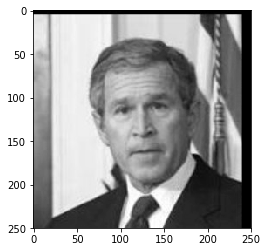

In [3]:
image = data.images[100]
plt.imshow(image, cmap="gray")

In [4]:
x = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.12, random_state=12)

In [7]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### PCA降维

In [8]:
# whiten 白化处理，使方差一致
# n_components 主要成分
# svd_solver 算法
pca = PCA(n_components=300, svd_solver="randomized", whiten=True)

In [9]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [13]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
# 选取最重要的 300 个数据
X_train_pca.shape

(1133, 300)

In [15]:
svc1 = SVC()
param = {"C": [0.2, 0.3, 0.8, 1,3,5,7,9],
         "gamma": [0.001, 0.002, 0.003, 0.006, 0.008, 0.01, 0.007, 0.015]}
gcv = GridSearchCV(svc1, param_grid=param)

In [20]:
gcv.fit(X_train_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.2, 0.3, 0.8, 1, 3, 5, 7, 9], 'gamma': [0.001, 0.002, 0.003, 0.006, 0.008, 0.01, 0.007, 0.015]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)